# Jupyter Notebook Project

## 1 - Summary of Selected Project Topic
<br>

The project topic that I have chosen revolve around COVID-19 and GIS application. This topic has affected me in a numerous ways and was inspired by [this post](https://towardsdatascience.com/visualizing-the-coronavirus-pandemic-with-choropleth-maps-7f30fccaecf5). 

The author illustrated and provided examples of how to display COVID-19 using choropleth maps for the entire world using python plotly, numpy, pandas, and other modules. 

This final project is aimed to analyze COVID-19 data for the United States only and provide visualizations. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from matplotlib.ticker import MultipleLocator
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# load dataset and find latest COVID-19 results
df = pd.read_json("https://covidtracking.com/api/v1/states/daily.json")
df = df.sort_values(by=["date"], ascending=False)
lastDate = df["date"][0]
df_latest = df.loc[df["date"] == lastDate]

df = df.rename(columns={"dateChecked": "date",
                        "totalTestResults": "Total Cases"})

fig = go.Figure(data=go.Choropleth(
    locations=df_latest['state'],
    locationmode='USA-states',
    z=df_latest['positive'],
    colorscale='darkmint',
    marker_line_color='black',
    marker_line_width=0.5,
    ))
fig.update_geos(
    visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(
    title_text='Total Confirmed Cases in USA as of {}'.format(lastDate),
    title_x=0.5,
    geo=dict(projection_type='albers usa'),
    height=500,
    width=700
)

fig.show()

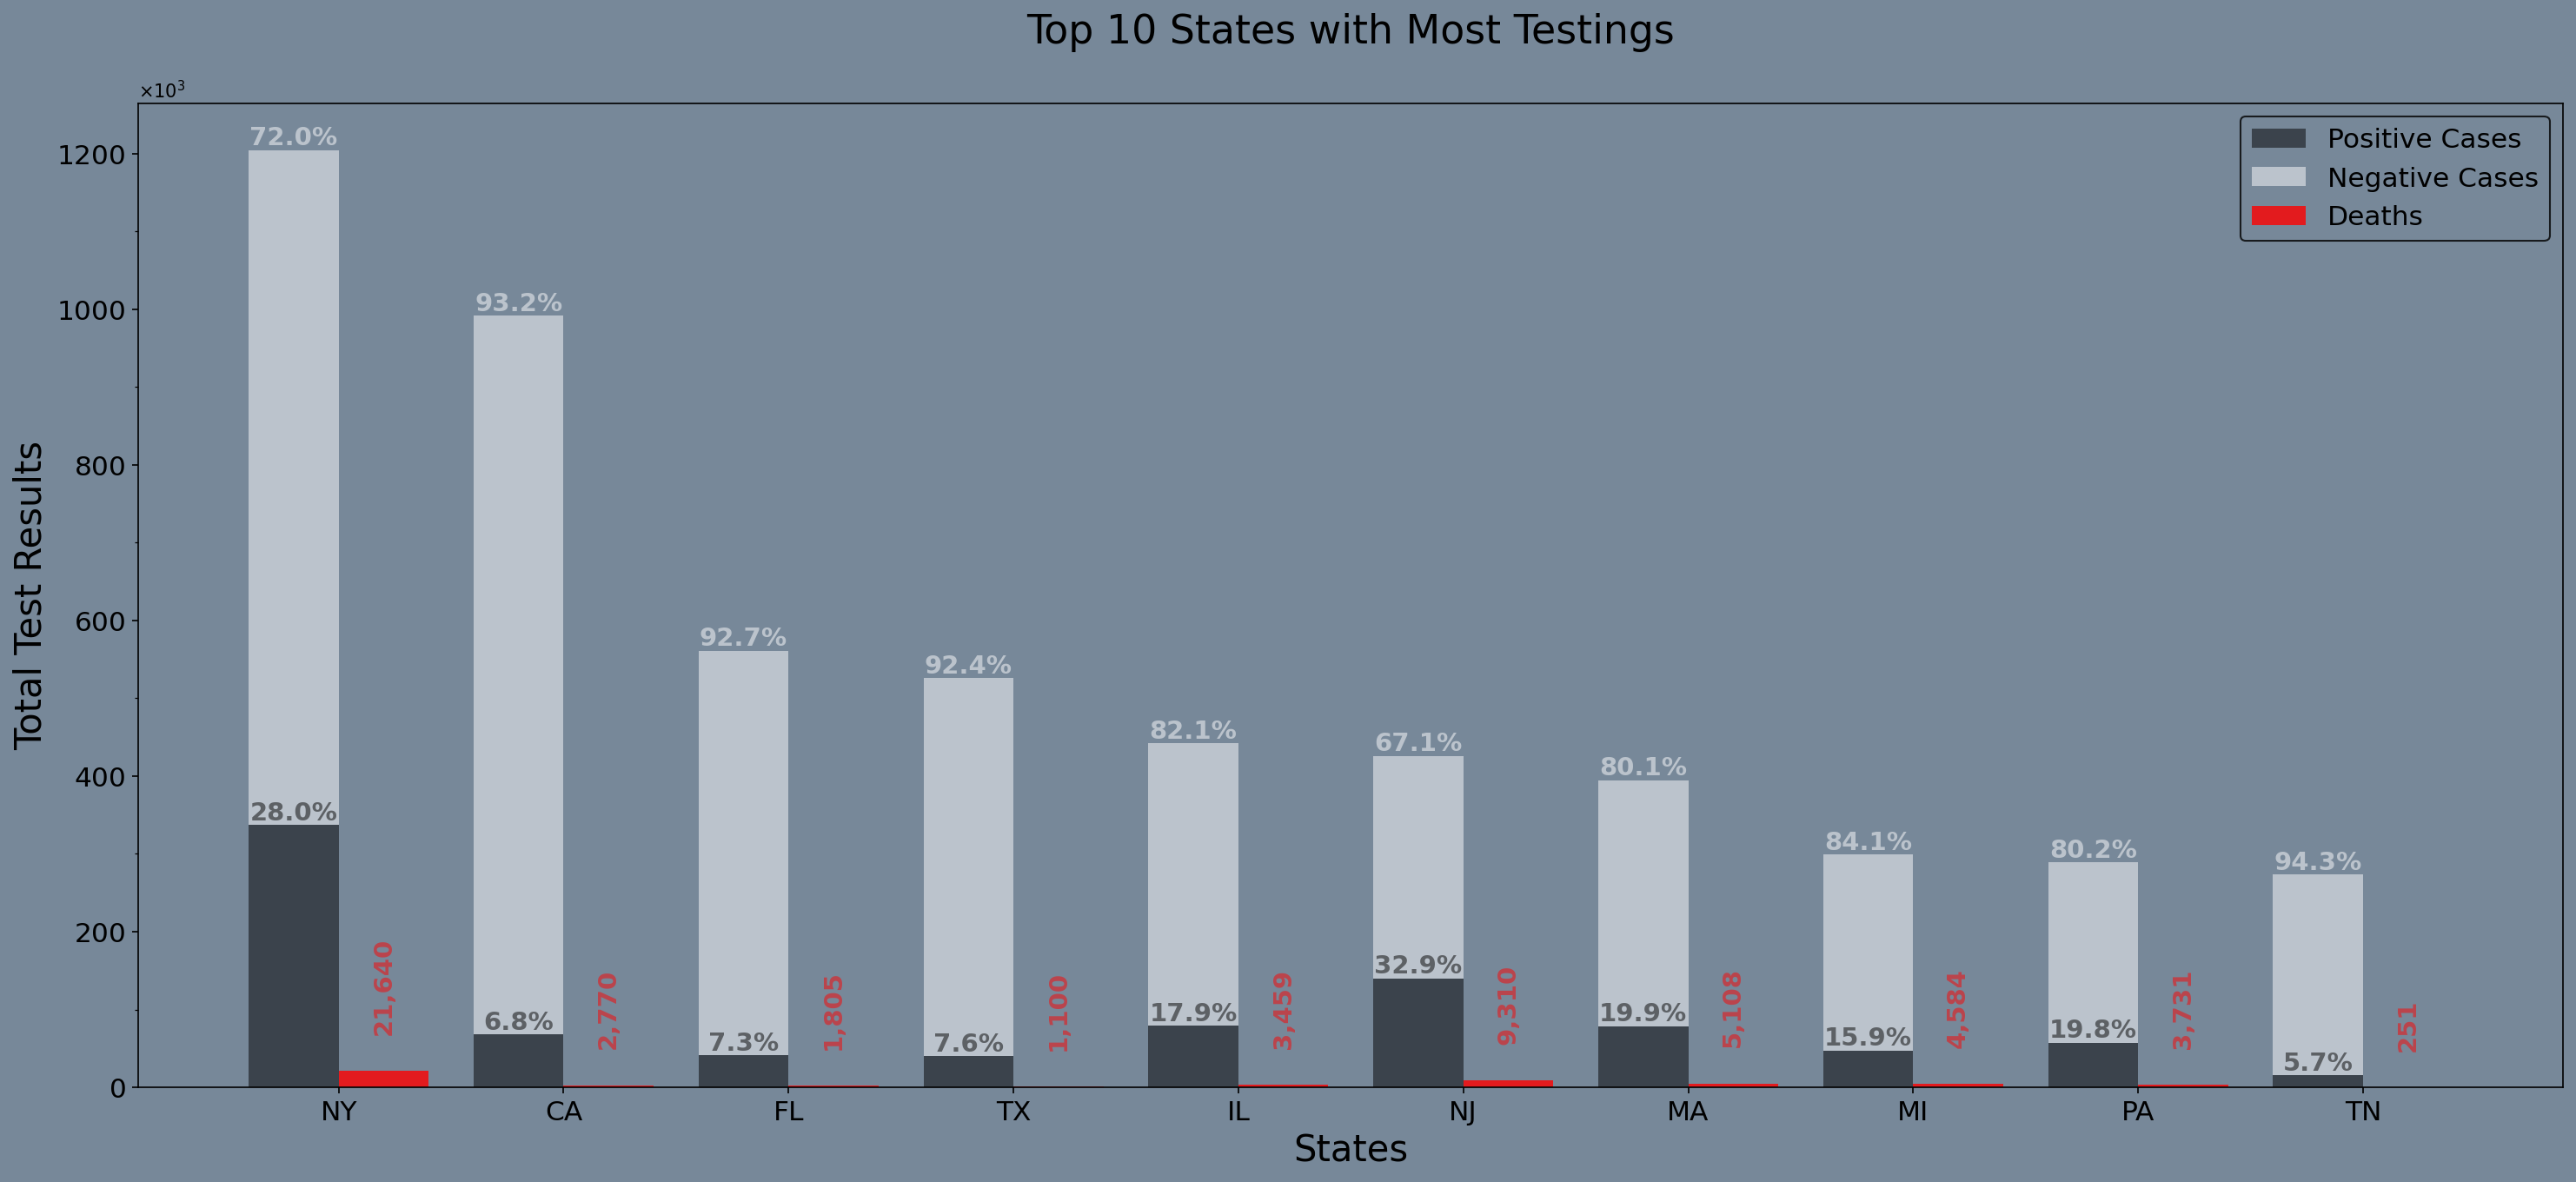

In [2]:
#sort and find top 10 states
df_latest = df_latest.sort_values(by="totalTestResults", ascending=False)[0:10]

#plot variables
x = np.arange(10)
width = 0.4
x_labels = df_latest["state"].tolist()

#initial figure
fig, ax = plt.subplots(figsize=(24, 10), dpi=150,
                       facecolor="lightslategray", edgecolor='k')

# bar graphs for positive, negative, and deaths
pos = ax.bar(x-width/2.,
             df_latest["positive"],
             width,
             color="black",
             alpha=0.5,
             label="Positive Cases"
             )

neg = ax.bar(x-width/2.,
             df_latest["negative"],
             width,
             color="white",
             alpha=0.5,
             bottom=df_latest["positive"],
             label="Negative Cases"
             )
death = ax.bar(x+width/2.,
               df_latest["death"],
               width,
               color="red",
               alpha=0.8,
               label="Deaths"
               )

# adding labels for stacked bar
def addValuesStacked(pos, neg):
    for r1, r2 in zip(pos, neg):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2.,
                 h1,
                 "{:.1%}".format(h1/(h1+h2)),
                 ha="center",
                 va="bottom",
                 color="black",
                 alpha=0.5,
                 fontsize=14,
                 fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2.,
                 h1 + h2,
                 "{:.1%}".format(h2/(h1+h2)),
                 ha="center",
                 va="bottom",
                 color="white",
                 alpha=0.5,
                 fontsize=14,
                 fontweight="bold")


def addValuesBar(bar):
    for rect in bar:
        h3 = rect.get_height()
        ax.annotate('{:,}'.format(int(h3)),
                    xy=(rect.get_x()+rect.get_width()/2., h3),
                    xytext=(0, 20),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    color='red',
                    rotation=90,
                    alpha=0.5,
                    fontsize=14,
                    fontweight="bold"
                    )


# figure adjustment
ax.set_ylabel('Total Test Results')
ax.set_xlabel('States')
ax.set_title('Top 10 States with Most Testings',
             fontsize=22,
             y=1.05)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
plt.ticklabel_format(style='sci', axis='y', scilimits=(3, 3), useMathText=True)
ax.yaxis.set_minor_locator(MultipleLocator(100000))

# add value labels on bar graphs
addValuesStacked(pos, neg)
addValuesBar(death)

# adjust axes label sizes
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(20)

# colors and yaxis labels
plt.bgcolor = "black"
ax.set_facecolor('lightslategray')
plt.legend(loc="upper right", fontsize=15,
           facecolor="lightslategray", edgecolor="k")


plt.show()

In [3]:
# get population data
URL = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv"
fileName = 'pop10-19.csv'

urlretrieve(URL, fileName)








('pop10-19.csv', <http.client.HTTPMessage at 0x1120d3da0>)

In [4]:
df_pop = pd.read_csv(fileName, encoding='latin-1')

df_popSum = df_pop.loc[df_pop["STNAME"] == df_pop["CTYNAME"],["STNAME","POPESTIMATE2019"]]
df_popSumTop = df_popSum.groupby("STNAME").agg({"POPESTIMATE2019": "sum"})
df_popSumTop = df_popSumTop.sort_values(by="POPESTIMATE2019",ascending = False)


#total US population in 2019
totalUSPop = df_popSum.sum(axis=0)

# df_popSumTop["STNAME"] = df_popSum["STNAME"]

In [5]:
df_popSumTop[0:10]

,POPESTIMATE2019
STNAME,
California,39512223
Texas,28995881
Florida,21477737
New York,19453561
Pennsylvania,12801989
Illinois,12671821
Ohio,11689100
Georgia,10617423
North Carolina,10488084


In [6]:
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,Total Cases,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200511,AK,381.0,28299.0,NaN,7.0,NaN,NaN,NaN,NaN,...,NaN,28680,28680,28680,2,0.0,0.0,1314.0,2.0,1316.0
29,20200511,MT,459.0,22113.0,NaN,4.0,62.0,NaN,NaN,NaN,...,62.0,22572,22572,22572,30,0.0,0.0,867.0,1.0,868.0
31,20200511,ND,1518.0,45496.0,NaN,34.0,115.0,NaN,NaN,NaN,...,115.0,47014,47014,47014,38,1.0,5.0,2118.0,27.0,2145.0
32,20200511,NE,8315.0,37924.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,46239,46239,46239,31,2.0,0.0,589.0,81.0,670.0
33,20200511,NH,3160.0,31723.0,261.0,113.0,318.0,NaN,97.0,NaN,...,318.0,35144,34883,34883,33,2.0,5.0,1281.0,149.0,1430.0


In [45]:
import requests
from bs4 import BeautifulSoup

#Find a table to convert State names to State abbreviation
url = "https://www.50states.com/abbreviations.htm"

r = requests.get(url)
content = r.text

soup = BeautifulSoup(content,'html.parser')

table = soup.find_all('table',class_="spaced stripedRows abbreviations-table table table-hover")
table = table[0]

USAbb_list = list()
USAbb_dict = dict()

for row in table.find_all('tr'):
    for cell in row.find_all('td'):
        USAbb_list.append(cell.text)

for i in range(len(USAbb_list)):
    if i % 2 != 1:
        USAbb_dict[USAbb_list[i]] = USAbb_list[i+1]

In [46]:
USAbb_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY',
 'District of Columbia': 'DC

In [47]:
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,Total Cases,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200511,AK,381.0,28299.0,NaN,7.0,NaN,NaN,NaN,NaN,...,NaN,28680,28680,28680,2,0.0,0.0,1314.0,2.0,1316.0
29,20200511,MT,459.0,22113.0,NaN,4.0,62.0,NaN,NaN,NaN,...,62.0,22572,22572,22572,30,0.0,0.0,867.0,1.0,868.0
31,20200511,ND,1518.0,45496.0,NaN,34.0,115.0,NaN,NaN,NaN,...,115.0,47014,47014,47014,38,1.0,5.0,2118.0,27.0,2145.0
32,20200511,NE,8315.0,37924.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,46239,46239,46239,31,2.0,0.0,589.0,81.0,670.0
33,20200511,NH,3160.0,31723.0,261.0,113.0,318.0,NaN,97.0,NaN,...,318.0,35144,34883,34883,33,2.0,5.0,1281.0,149.0,1430.0
